<a href="https://colab.research.google.com/github/redher97/DheerajReddy_INFO5731_-Fall2021/blob/main/INFO5731_Assignment_Four_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
#all the python libraries needed for functionality
import pandas as pd
import json
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk import sent_tokenize
stop = stopwords.words('english')
import warnings
warnings.simplefilter('ignore')
from itertools import chain
from nltk.tokenize import word_tokenize
import gensim.corpora as corpora
import spacy
from gensim import corpora, models
from gensim.models import LdaModel,LsiModel
from pprint import pprint
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm, naive_bayes

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#defining functions for lemmatization,bigrams,trigrams,coherence values,corpus dictionary, text cleaning
def lem(rvtokens, reqd_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    lem = []
    for tokens in rvtokens:
        lem.append([token.lemma_ for token in nlp(" ".join(tokens))  if token.pos_ in reqd_tags])
    return lem
def dictionary_corp(lem_review):
    tag2word = corpora.Dictionary(lem_review)
    corpus = [tag2word.doc2bow(review) for review in lem_review]
    return tag2word, corpus
def bigrams(tokens):
    return [bigram_mod[doc] for doc in tokens]
def trigrams(tokens):
    return [trigram_mod[bigram_mod[doc]] for doc in tokens]
def create_gensim_lsa_model(dictionary,corpus,number_of_topics,words):
    lsamodel = LsiModel(corpus, num_topics=number_of_topics, tag2word = dictionary)
    pprint(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel
def coherence_values_lsa(dictionary, corpus, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(corpus, num_topics=number_of_topics, tag2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
def clean_text(text):
    return ' '.join([lemma.lemmatize(word) for word in ''.join(ch for ch in ' '.join([word for word in text.lower().split() if word not in stop]) if ch not in exclude).split()]).split()
df=pd.read_csv(r'C:\Users\reddy\OneDrive\Desktop\sentanalysis500.csv')
df = df.dropna()

In [ ]:
#stop word removal, appending the words
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tokens = []
for i in df['Reviews']:
    tokens.append(word_tokenize(i))
print(models.phrases.Phraser(models.Phrases(bigram[tokens], threshold=100))[models.phrases.Phraser(models.Phrases(tokens, min_count=5, threshold=100))[tokens[5]]])

['u', 'government', 'almost', 'topple', 'pretender', 'name', 'orange', 'wenwu', 'tony_leung', 'quote', 'typical', 'lighthearted', 'also', 'serious', 'addition', 'mcu', 'shangchi', 'legend_ten_ring', 'although', 'marvel', 'always', 'le', 'serious', 'dc', 'time', 'leave', 'superman', 'batman', 'cry', 'cap', 'sweet', 'superhero', 'seanshangchi', 'simu_liu', 'humanity', 'almost', 'hero', 'use', 'martial_art', 'press', 'open', 'sequence', 'bus', 'see', 'bad', 'come', 'cinematic', 'bus', 'rid', 'nobody', 'rouse', 'entertain', 'fight', 'sequence', 'laugh', 'balletlike', 'composition', 'satisfy', 'set', 'character', 'motivation', 'thing', 'get', 'heavy', 'sean', 'must', 'confront', 'potentially', 'kill', '1000yearold', 'mobster', 'dad', 'wenwu', 'awkwafinas', 'katy', 'seans', 'girlfriend', 'amuse', 'oneliners', 'throughout', 'adventure', 'right', 'lifesaving', 'shoot', 'big', 'end', 'battle', 'scene', 'director_destin_daniel_cretton', 'deftly', 'orchestrate', 'fight', 'character', 'line', 'aut

In [ ]:
data_lemmatized = lem(make_bigrams(tokens), reqd_tags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[4])

['u', 'government', 'almost', 'topple', 'pretender', 'name', 'wenwu', 'typical', 'lighthearted', 'also', 'serious', 'addition', 'mcu', 'shangchi', 'ring', 'always', 'le', 'serious', 'time', 'cap', 'sweet', 'superhero', 'humanity', 'almost', 'hero', 'use', 'martial_art', 'press', 'open', 'sequence', 'bus', 'see', 'bad', 'come', 'cinematic', 'bus', 'rid', 'rouse', 'entertain', 'fight', 'sequence', 'laugh', 'composition', 'satisfy', 'set', 'character', 'motivation', 'thing', 'get', 'heavy', 'sean', 'confront', 'potentially', 'kill', 'mobster', 'dad', 'sean', 'girlfriend', 'amuse', 'oneliner', 'adventure', 'right', 'lifesaving', 'shoot', 'big', 'end', 'battle', 'scene', 'deftly', 'orchestrate', 'fight', 'character', 'line', 'authority', 'much', 'season', 'filmmaker', 'never', 'lose', 'sight', 'central', 'motifthe', 'affirmation', 'family', 'primacy', 'potential', 'chaos', 'giant', 'cast', 'multiple', 'plot', 'strand', 'host', 'unity', 'character', 'dialogue', 'marvel', 'whole', 'family', '

In [ ]:
#lda
dictionary, corpus =  prpeare_dictionary_corpus(lem(tokens, reqd_tags=['NOUN', 'ADJ', 'VERB', 'ADV']))
number_of_topics = 10
lda_model = LdaModel(corpus, num_topics = number_of_topics, tag2word=dictionary,passes=20,chunksize = 100)
pprint(lda_model.print_topics())

[(0,
  '0.004*"impossible" + 0.004*"fascinate" + 0.004*"noticeably" + '
  '0.004*"minimal" + 0.003*"ponderous" + 0.003*"tedious" + 0.002*"divine" + '
  '0.002*"overcome" + 0.002*"intellectual" + 0.002*"ohsomagical"'),
 (1,
  '0.016*"badass" + 0.004*"forever" + 0.001*"nuisance" + 0.001*"throwaway" + '
  '0.000*"participate" + 0.000*"superheroe" + 0.000*"beloved" + '
  '0.000*"nevertire" + 0.000*"crossover" + 0.000*"heavier"'),
 (2,
  '0.021*"combine" + 0.003*"masterpiece" + 0.003*"distinctive" + '
  '0.003*"suprise" + 0.003*"producer" + 0.002*"yell" + 0.002*"doubly" + '
  '0.002*"rooftop" + 0.002*"kombat" + 0.002*"splash"'),
 (3,
  '0.021*"vfx" + 0.014*"display" + 0.014*"straight" + 0.013*"native" + '
  '0.010*"moreover" + 0.009*"expansion" + 0.009*"dull" + '
  '0.009*"cinematographic" + 0.009*"godzilla" + 0.006*"dumb"'),
 (4,
  '0.000*"fctcyycctctcrcrctuvy" + 0.000*"h" + 0.000*"freak" + 0.000*"soooooo" '
  '+ 0.000*"chicken" + 0.000*"pig" + 0.000*"derp" + 0.000*"racism" + '
  '0.000*"r

In [ ]:
#lsa
number_of_topics = 10
words = 10
model = create_gensim_lsa_model(dictionary, corpus, number_of_topics, words)

[(0,
  '-0.400*"movie" + -0.394*"film" + -0.270*"marvel" + -0.224*"character" + '
  '-0.193*"good" + -0.152*"scene" + -0.148*"fight" + -0.146*"story" + '
  '-0.139*"well" + -0.130*"make"'),
 (1,
  '0.692*"film" + -0.644*"movie" + 0.073*"ring" + -0.066*"know" + 0.065*"mcu" '
  '+ -0.061*"do" + -0.049*"much" + -0.048*"story" + -0.045*"get" + '
  '0.045*"come"'),
 (2,
  '0.305*"good" + 0.275*"mcu" + -0.216*"character" + -0.206*"marvel" + '
  '-0.200*"story" + -0.196*"well" + 0.181*"movie" + 0.181*"scene" + '
  '-0.171*"little" + -0.170*"make"'),
 (3,
  '0.406*"movie" + 0.355*"film" + -0.270*"character" + -0.235*"mcu" + '
  '0.231*"marvel" + -0.227*"also" + -0.226*"really" + -0.220*"good" + '
  '-0.170*"story" + -0.118*"get"'),
 (4,
  '0.260*"well" + -0.215*"ring" + 0.212*"really" + -0.197*"story" + '
  '-0.182*"marvel" + -0.174*"universe" + 0.173*"little" + 0.173*"great" + '
  '-0.170*"cinematic" + 0.155*"love"'),
 (5,
  '0.568*"marvel" + -0.306*"feel" + 0.241*"good" + 0.239*"also" + '
  

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here
# TF IDF is used to identify the important words or more precisely rare words and it can be applied to a broad spectrum with ease
#  functions and variables that will perform the metrics which are based on Evaluation parameters:
#  Accuracy, Recall, Precison, F-1 score 
df1 = df
df1['cleaned text']=df1['Reviews'].apply(clean_text)
TfidfVectorizer(ngram_range=(1,2), max_features=1000).fit(df1['Reviews'])
x_values = Tfidfvector.transform(df1['Reviews'])
y_values = LabelEncoder().fit_transform(df1['Analysis'])
#SVM
X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values, y_values, test_size=0.2)
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
prediction = svm_model.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted)))
rep = classification_report(y_test, predicted, output_dict=True)
rep

Accuracy score is 0.9529411764705882


{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4},
 '2': {'precision': 0.9529411764705882,
  'recall': 1.0,
  'f1-score': 0.9759036144578312,
  'support': 81},
 'accuracy': 0.9529411764705882,
 'macro avg': {'precision': 0.4764705882352941,
  'recall': 0.5,
  'f1-score': 0.4879518072289156,
  'support': 85},
 'weighted avg': {'precision': 0.9080968858131487,
  'recall': 0.9529411764705882,
  'f1-score': 0.9299787384833451,
  'support': 85}}

In [ ]:
#baiyes prediction
bayes = naive_bayes.MultinomialNB()
bayes.fit(X_train, y_train)
predicted_bayes = bayes.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted_bayes)))
rep_bayes = classification_report(y_test, predicted_nb, output_dict=True)
rep_bayes

Accuracy score is 0.9529411764705882


{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4},
 '2': {'precision': 0.9529411764705882,
  'recall': 1.0,
  'f1-score': 0.9759036144578312,
  'support': 81},
 'accuracy': 0.9529411764705882,
 'macro avg': {'precision': 0.4764705882352941,
  'recall': 0.5,
  'f1-score': 0.4879518072289156,
  'support': 85},
 'weighted avg': {'precision': 0.9080968858131487,
  'recall': 0.9529411764705882,
  'f1-score': 0.9299787384833451,
  'support': 85}}

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here
train = pd.read_csv(r"C:\Users\reddy\Downloads\assignment4-question3-data\train.csv")
test = pd.read_csv(r"C:\Users\reddy\Downloads\assignment4-question3-data\test.csv")
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


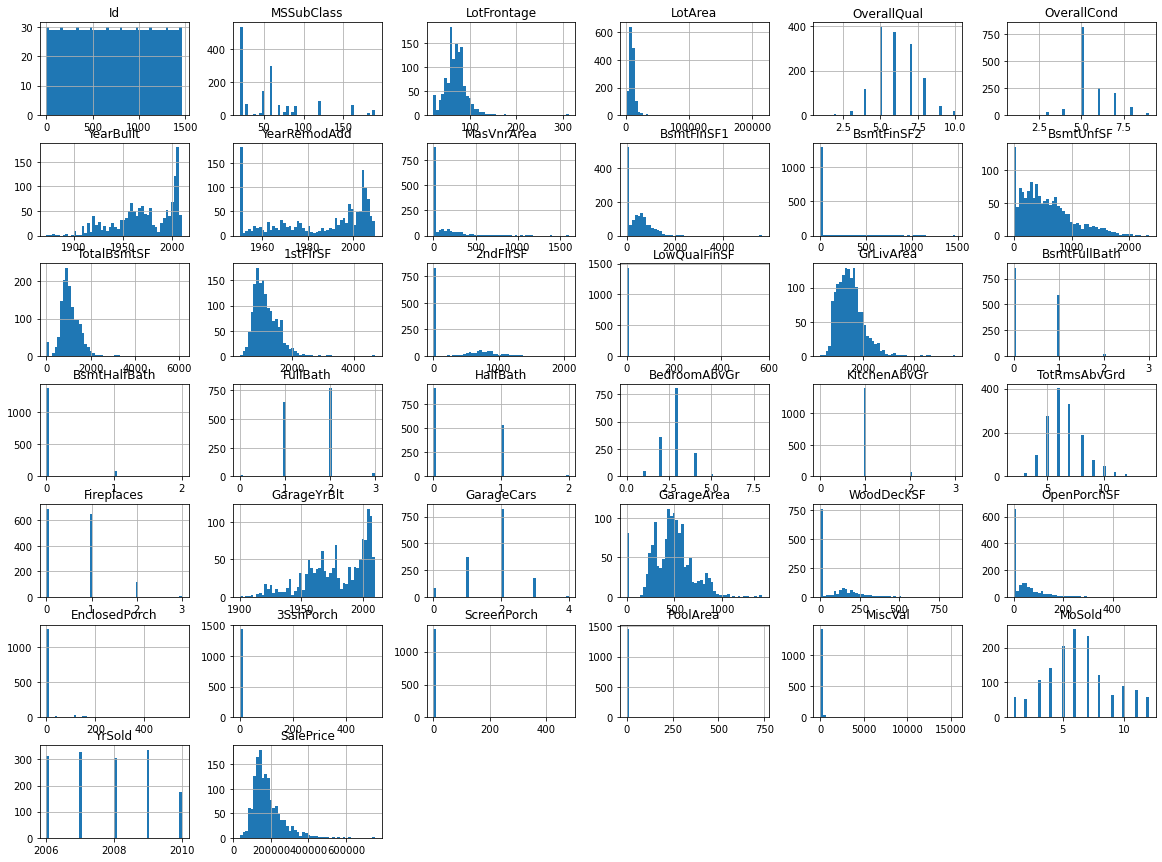

In [ ]:
#plots of all explanatory variables
train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

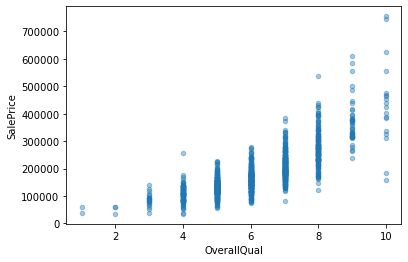

In [ ]:
train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.4)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

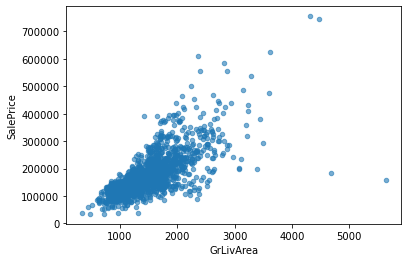

In [ ]:
train.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.6)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

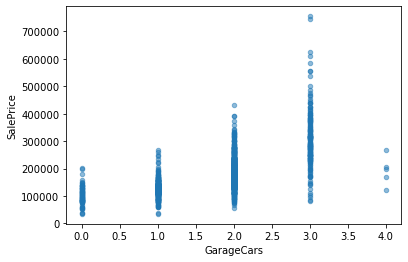

In [ ]:
train.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

<AxesSubplot:>

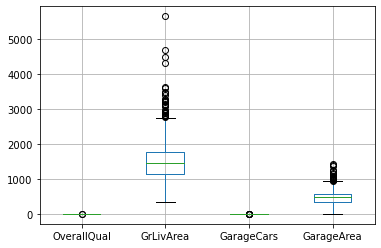

In [ ]:
train.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

In [ ]:
train.fillna(train_dataset.mean(), inplace = True)
test.fillna(test_dataset.mean(), inplace = True)

In [ ]:
cols = ('GarageCond', 'RoofStyle', 'LandContour',  'Electrical', 'RoofMatl', 'Heating', 'Foundation', 'MiscFeature', 'SaleType', 'GarageType', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for i in cols:
    le = LabelEncoder()
    le.fit(list(train_dataset[i].values))
    train[i] = le.transform(list(train_dataset[i].values))
x = train[train_dataset.columns[:80]]
y = train['SalePrice']
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size=0.2)
reg = LinearRegression()  
reg.fit(xtrain, ytrain)
values_predcited = reg.predict(xtest)
print("R-Square value of linear Regression : ", reg.score(xtrain,ytrain))
sales_predict = pd.DataFrame(values_predcited, columns =['Sales prediction'])
sales_predict

R-Square value of linear Regression :  0.8540196314324201


,Sales prediction
0,55767.275408
1,305460.817112
2,157872.676795
3,310221.104777
4,126602.081335
...,...
287,303880.768685
288,115224.115011
289,249999.109776
290,176358.049715
